<a href="https://colab.research.google.com/github/Su-ok/MT2025124_ML_Project2/blob/main/MultiLogistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ==== IMPORTS ====
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

# ==== LOAD DATA ====
data = pd.read_csv("/content/drive/MyDrive/ML kaggle data/forest_cover/covtype.csv")

print("Dataset shape:", data.shape)
print(data.columns)

# ==== PREPROCESSING ====
X = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]

print("Unique classes:", np.unique(y))

# ==== SCALING ====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==== TRAIN–VALIDATION SPLIT ====
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape, "X_val:", X_val.shape)

# ==== LOGISTIC REGRESSION (MULTICLASS) + RANDOM SEARCH ====
logreg = LogisticRegression(
    multi_class="ovr",   # one-vs-rest for multiclass
    max_iter=2000
)

param_dist = {
    "C": [3.0, 3.5, 4.0],       # small grid to prevent exploding training time
    "solver": ["lbfgs"],        # lbfgs works well for multiclass
}

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

logreg_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist,
    n_iter=3,                   # max possible combinations = 3
    scoring="accuracy",
    n_jobs=-1,
    cv=cv,
    random_state=42,
    verbose=2
)

logreg_search.fit(X_train, y_train)

print("\nBest Hyperparameters:")
print(logreg_search.best_params_)
print(f"Best CV Accuracy: {logreg_search.best_score_:.6f}")

# ==== EVALUATION ====
best_logreg = logreg_search.best_estimator_

y_train_pred = best_logreg.predict(X_train)
y_val_pred   = best_logreg.predict(X_val)

train_acc = accuracy_score(y_train, y_train_pred)
val_acc   = accuracy_score(y_val, y_val_pred)

print(f"\nTraining Accuracy (LogReg):   {train_acc:.6f}")
print(f"Validation Accuracy (LogReg): {val_acc:.6f}")

# print("\nClassification Report:")
# print(classification_report(y_val, y_val_pred))

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_val, y_val_pred))

print("\nLogistic Regression Multiclass Training Completed Successfully.")

Dataset shape: (581012, 55)
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
      

In [ ]:
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.69      0.70     42368
           2       0.74      0.80      0.77     56661
           3       0.62      0.85      0.71      7151
           4       0.66      0.28      0.39       549
           5       0.25      0.01      0.02      1899
           6       0.46      0.09      0.15      3473
           7       0.72      0.52      0.60      4102

    accuracy                           0.71    116203
   macro avg       0.59      0.46      0.48    116203
weighted avg       0.70      0.71      0.70    116203


Confusion Matrix:
[[29184 12396    45     0     0     1   742]
 [ 9970 45108  1369     2    57    77    78]
 [    0   774  6081    65     0   231     0]
 [    0     0   321   153     0    75     0]
 [   30  1687   160     0    21     1     0]
 [    0  1244  1888    12     6   323     0]
 [ 1938    25    19     0     0     0  2120]]


EDA

In [ ]:
## 1. Basic overview
print("\nColumns:", data.columns.tolist())

print("\nData types:")
print(data.dtypes)

print("\nMissing values per column:")
print(data.isnull().sum())


Columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

Data types:
Elevation                             int64
Aspect              

In [ ]:
## 2. Summary Statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000   

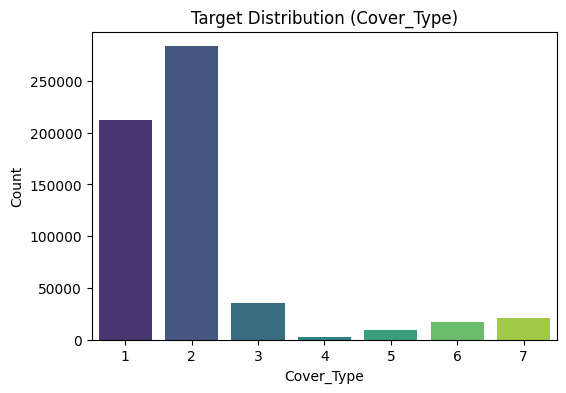


Class distribution (%):
Cover_Type
2    48.759922
1    36.460521
3     6.153746
7     3.530048
6     2.989095
5     1.633873
4     0.472796
Name: proportion, dtype: float64


In [ ]:
## 3. Target Variable Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="Cover_Type", data=data, palette="viridis")
plt.title("Target Distribution (Cover_Type)")
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.show()

print("\nClass distribution (%):")
print(data["Cover_Type"].value_counts(normalize=True)*100)

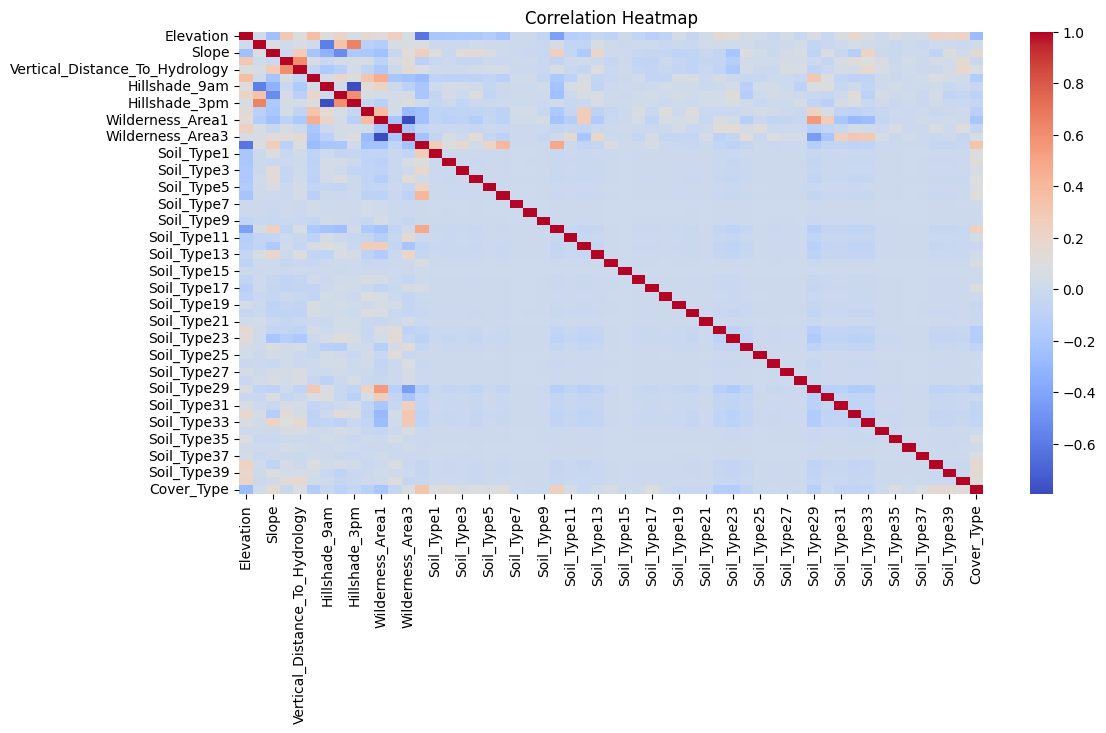


Top correlations with Cover_Type:
Cover_Type                            1.000000
Wilderness_Area4                      0.323200
Soil_Type10                           0.243876
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Slope                                 0.148285
Soil_Type40                           0.128351
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Soil_Type4                            0.099672
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type35                           0.080315
Soil_Type37                           0.080271
Soil_Type5                            0.077890
Soil_Type3                            0.068064
Wilderness_Area3                      0.066846
Soil_Type14                           0.065562
Soil_Type11                           0.035379
Soil_Type36              

In [ ]:
## 4. Correlation heatmap (numeric features)
plt.figure(figsize=(12,6))
corr = data.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Show top correlations with target
corr_target = corr["Cover_Type"].sort_values(ascending=False)
print("\nTop correlations with Cover_Type:")
print(corr_target)

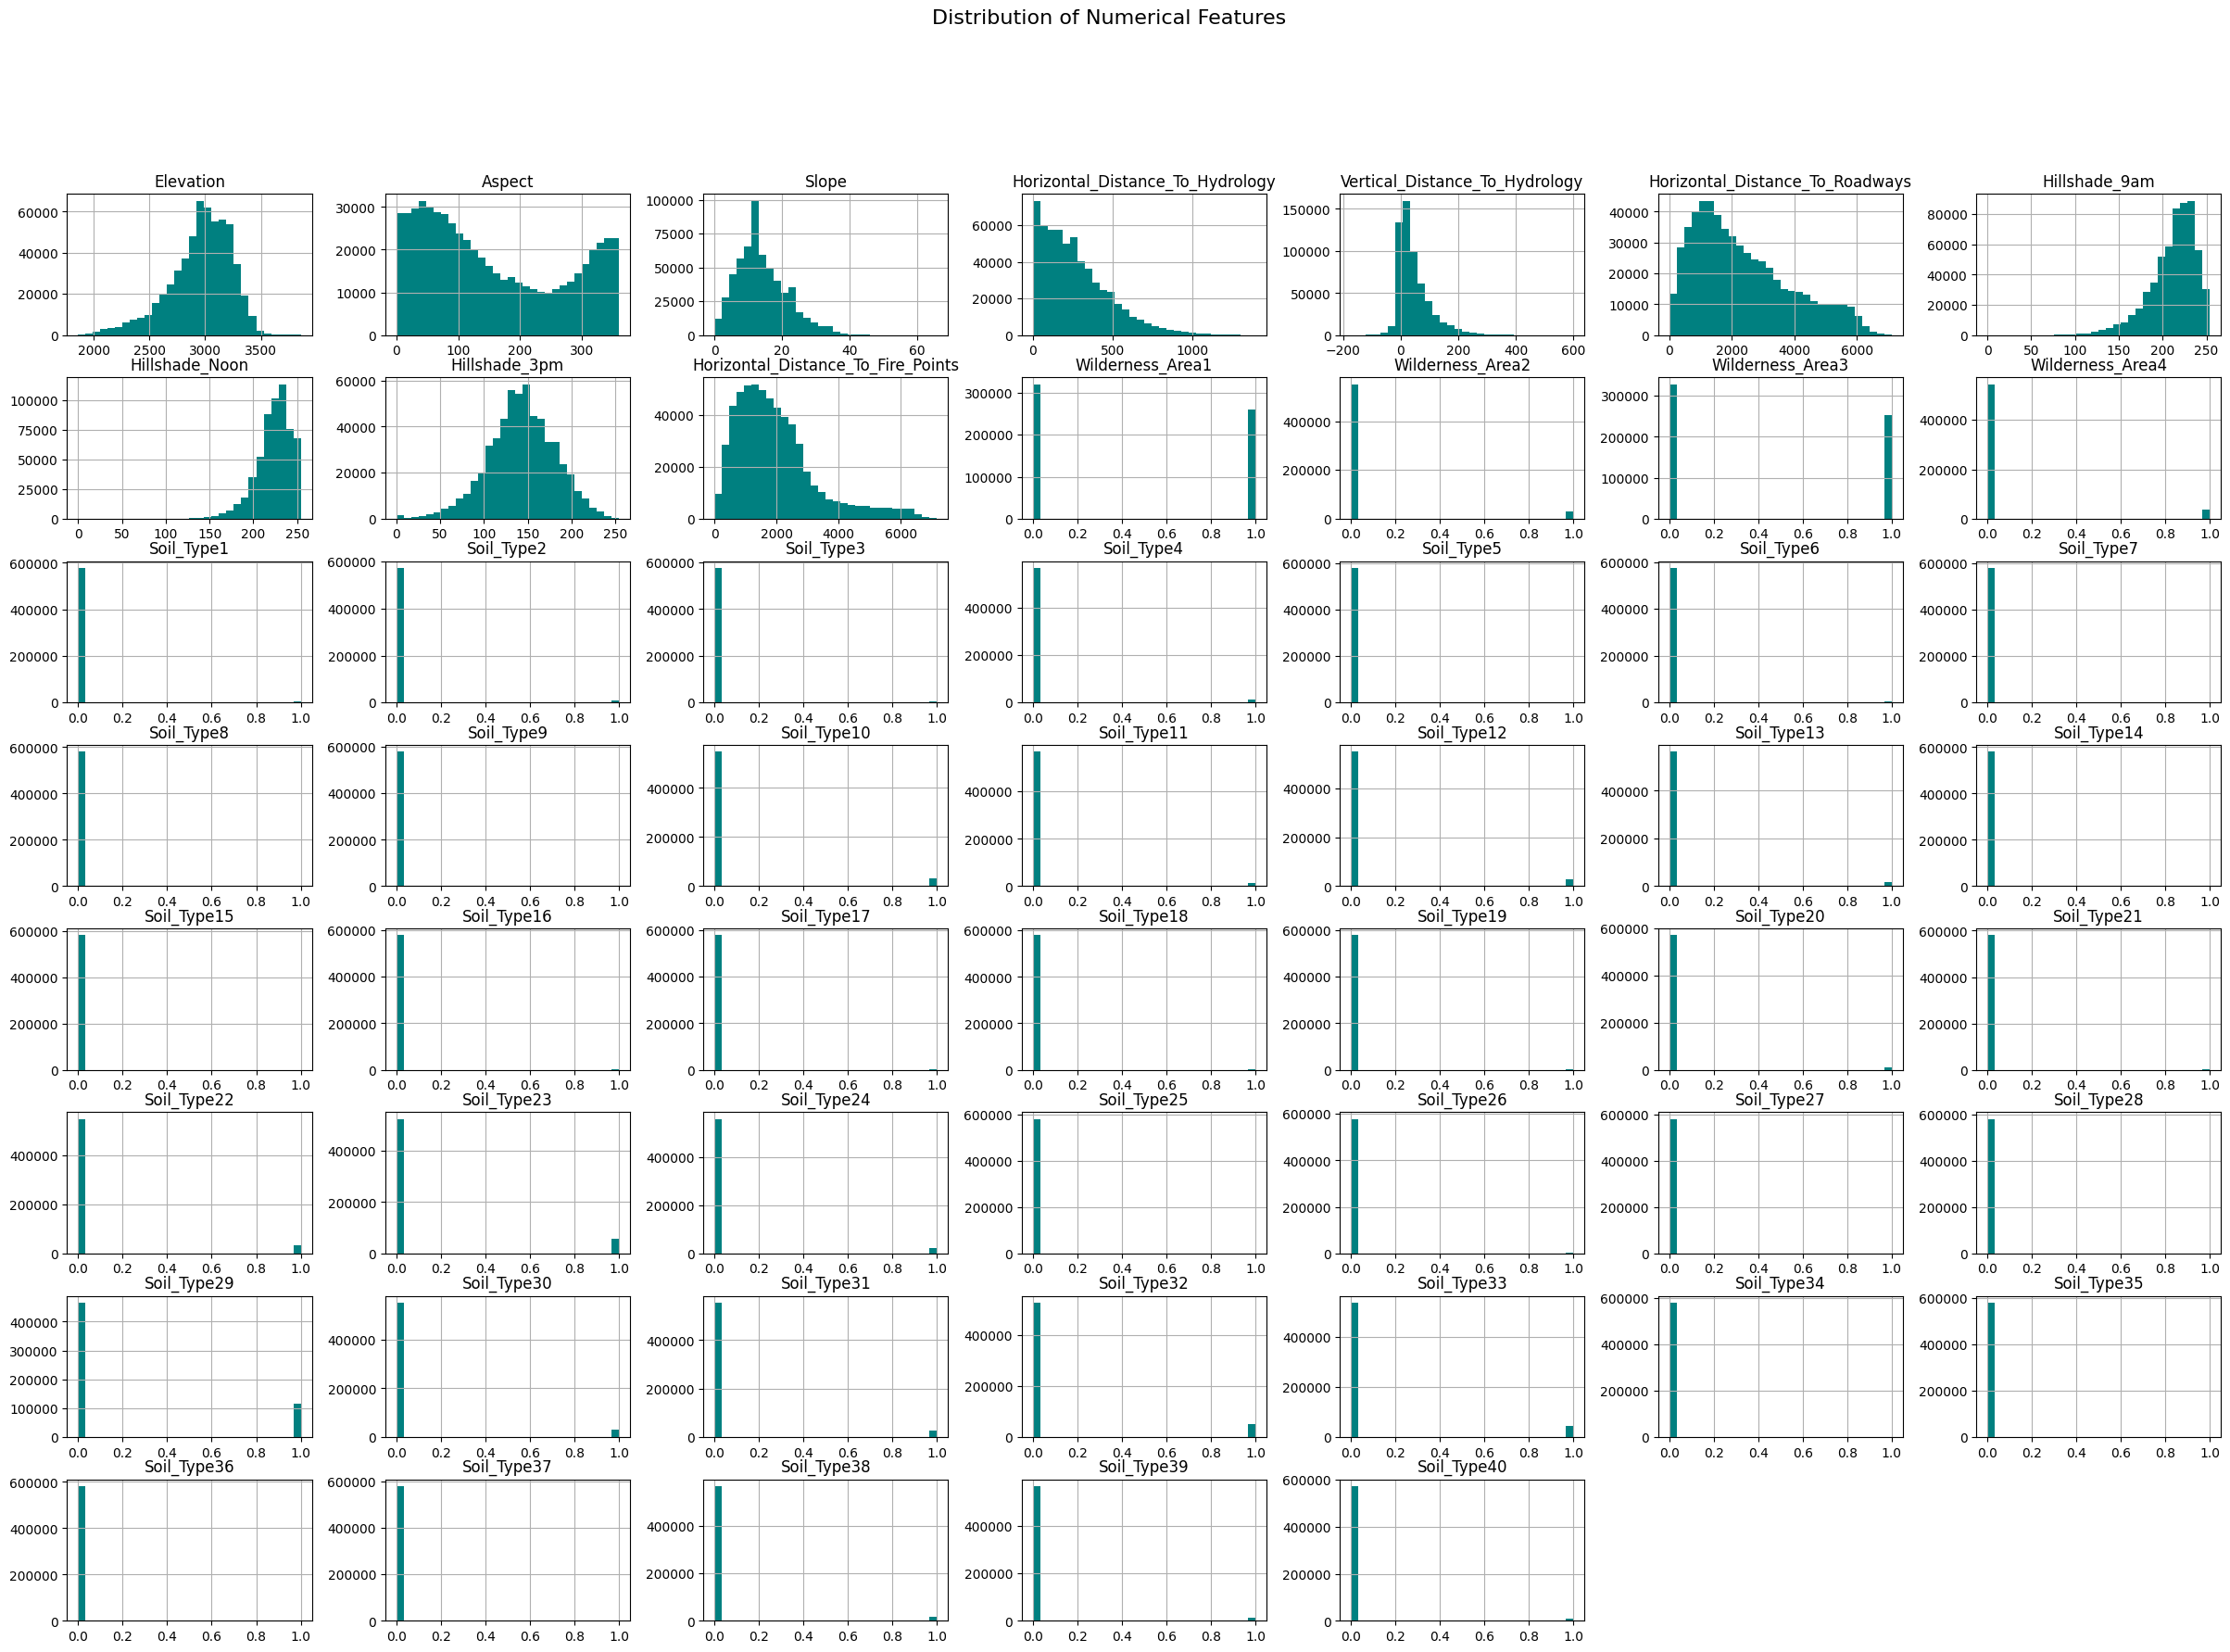

In [ ]:
## 5. Distribution plots of numerical features
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove("Cover_Type")  # exclude target

data[num_cols].hist(bins=30, figsize=(30,20), color="teal")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

In [ ]:
## 6. Outlier detection (Z-score method)
from scipy import stats

z_scores = np.abs(stats.zscore(data[num_cols]))
outliers = (z_scores > 3).sum(axis=0)

print("\nOutlier count per feature (|z| > 3):")
print(outliers)


Outlier count per feature (|z| > 3):
[ 5832     0  4074  7073 10059    33  7516  7082  3042 10853     0 29884
     0 36968  3031  7525  4823 12396  1597  6575   105   179  1147 32634
 12410 29971 17431   599     3  2845  3422  1899  4021  9259   838 33373
 57752 21278   474  2589  1086   946     0 30170 25666 52519 45154  1611
  1891   119   298 15573 13806  8750]


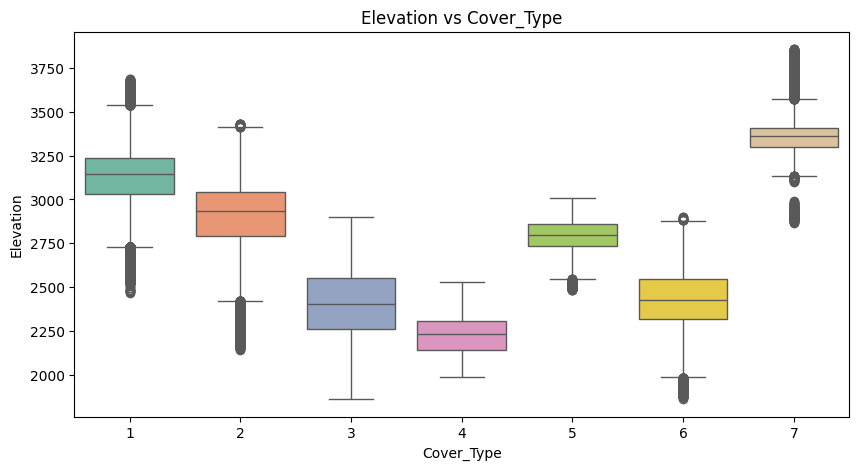

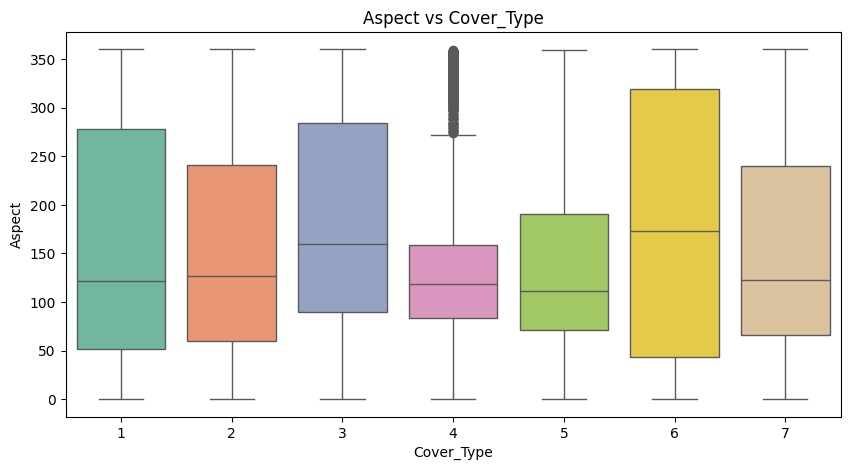

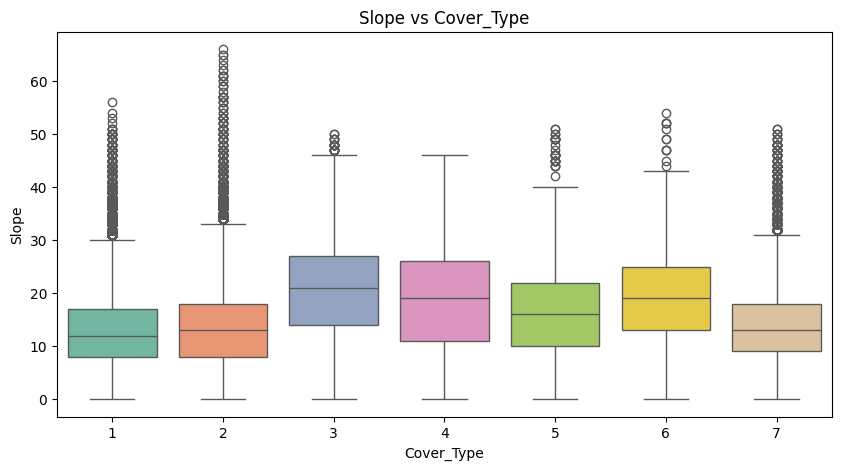

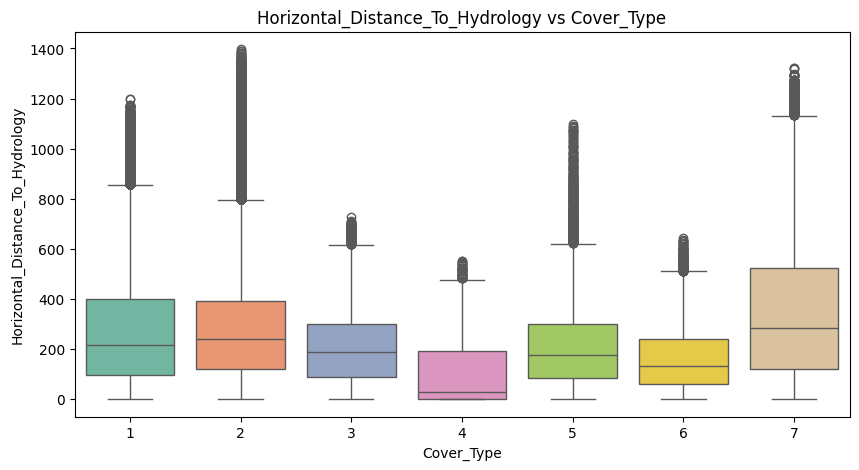

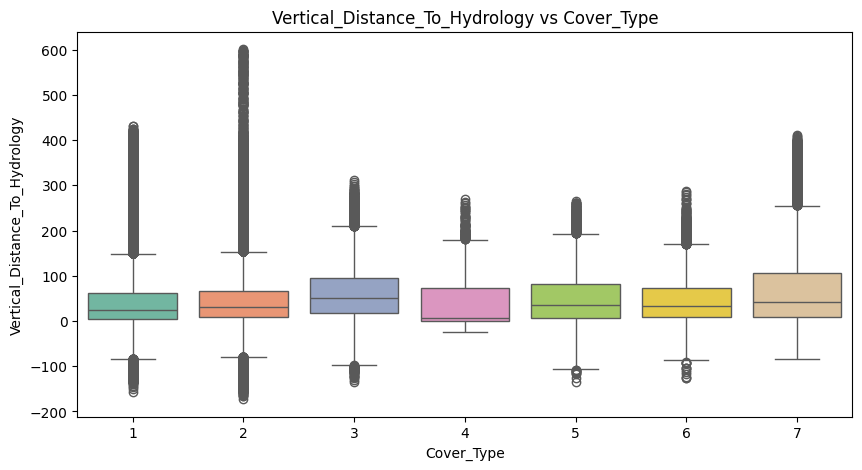

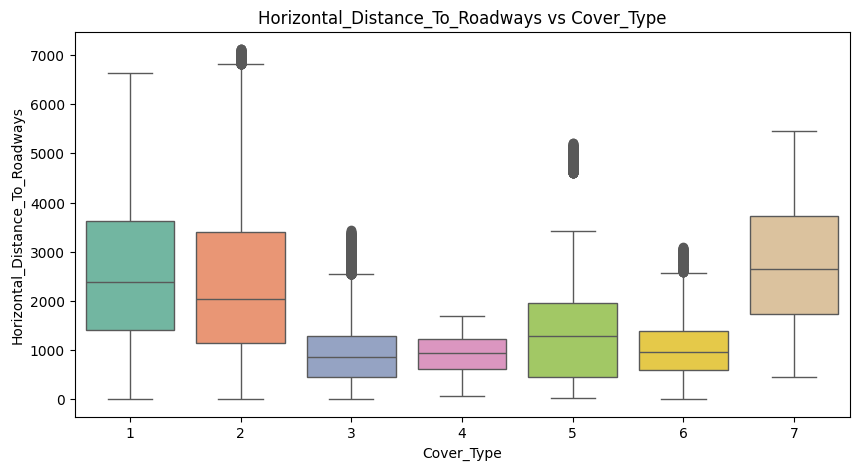

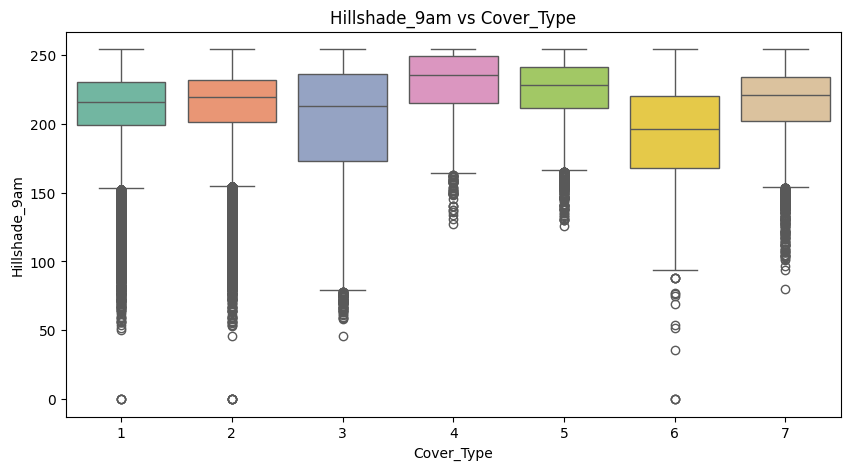

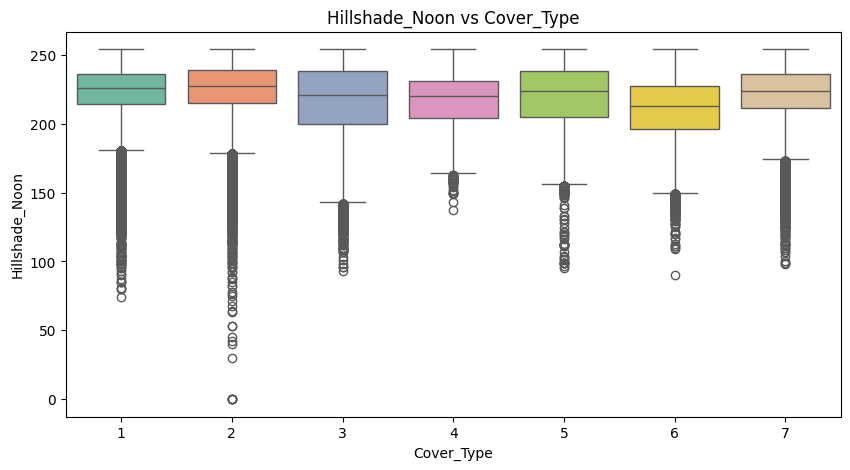

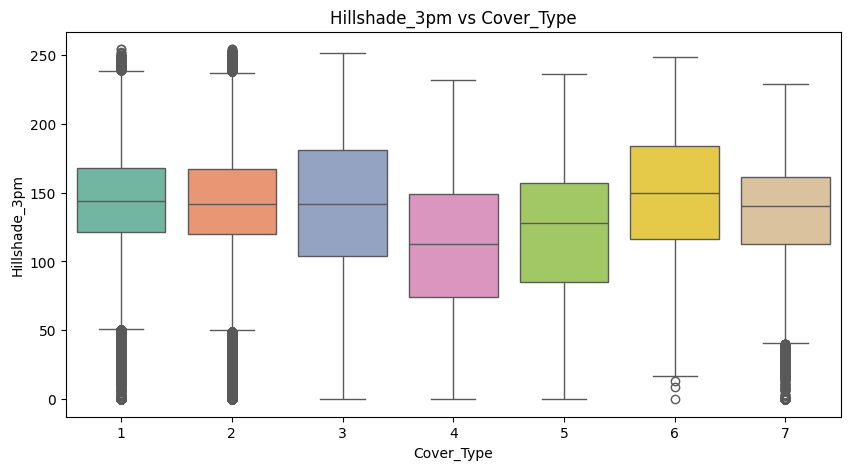

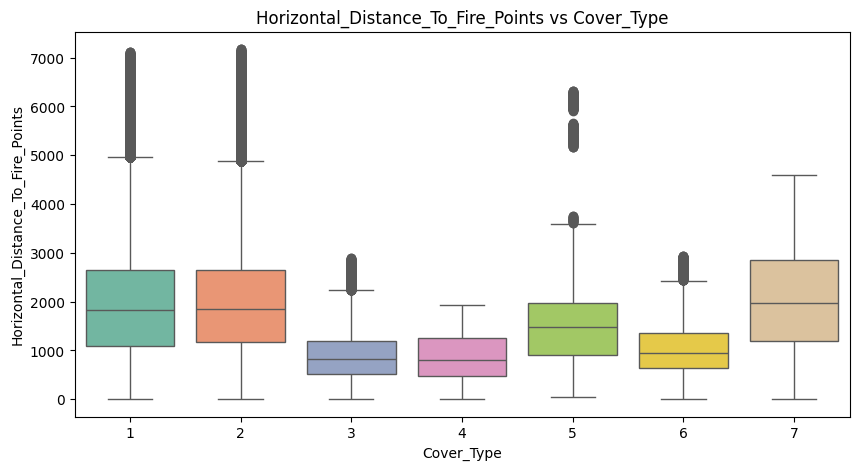

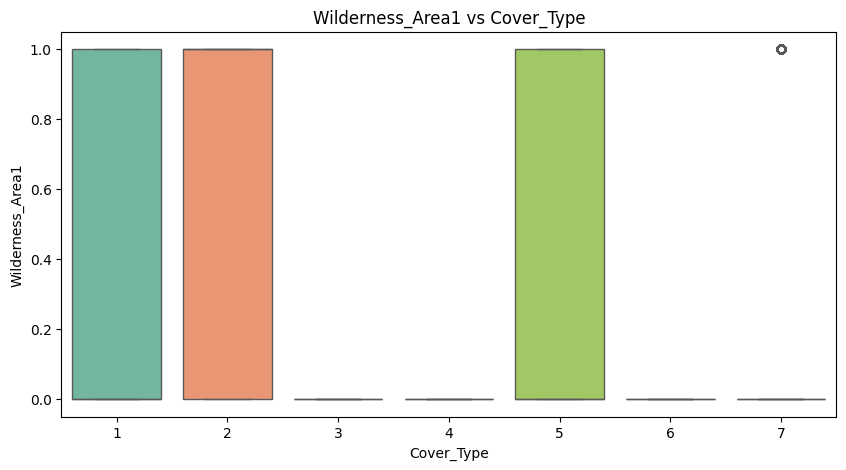

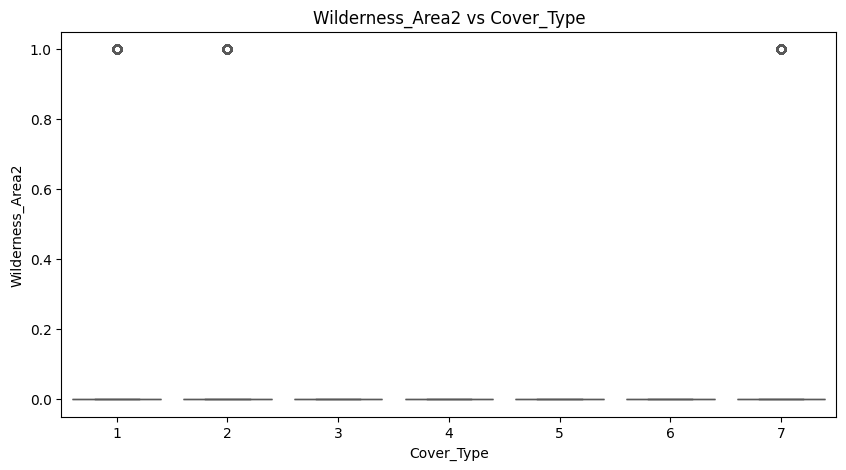

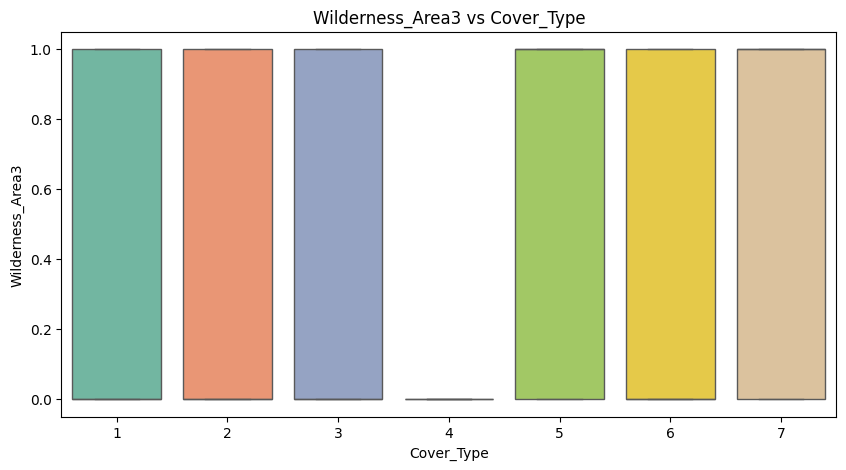

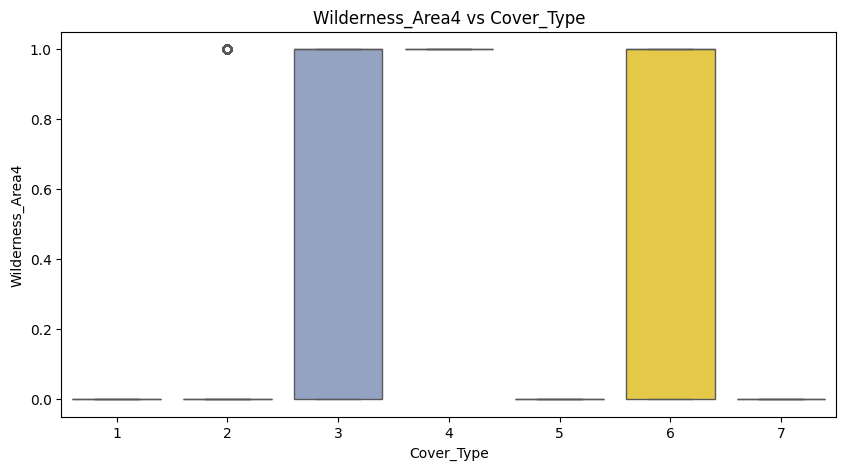

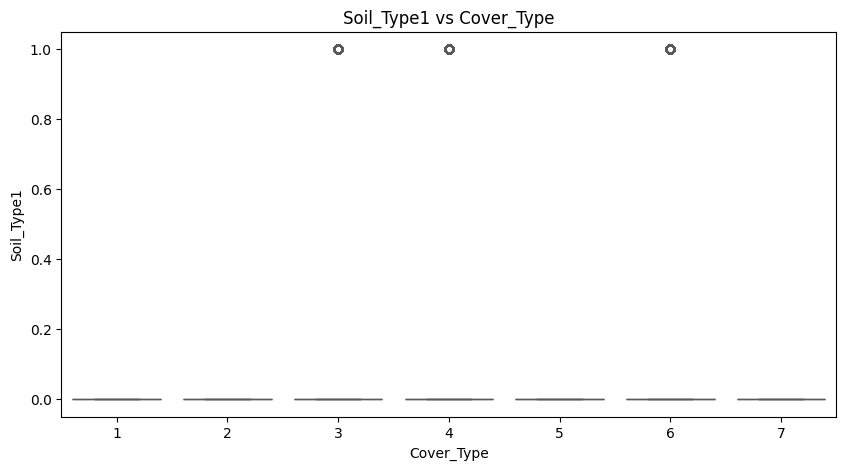

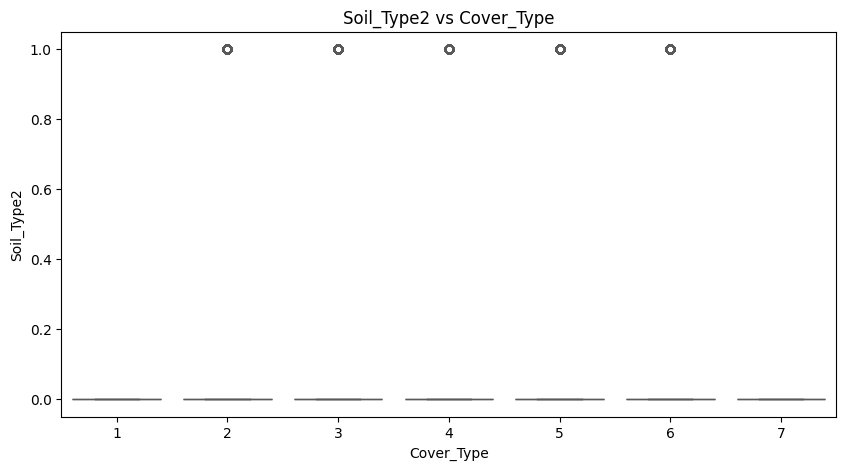

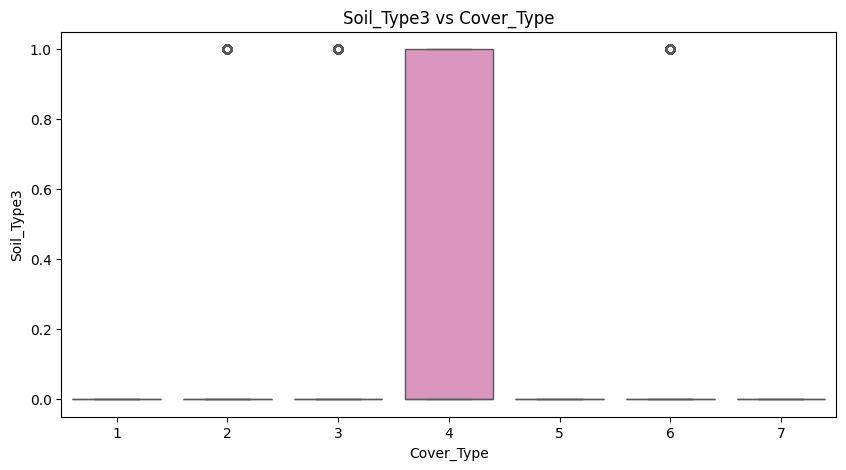

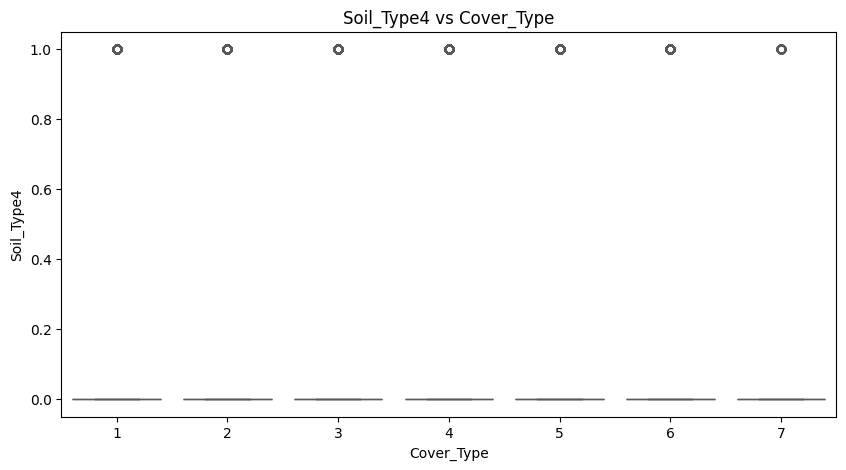

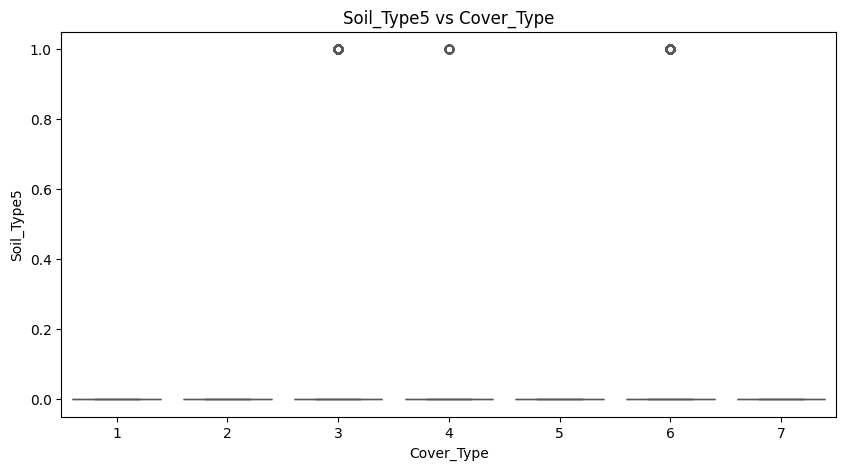

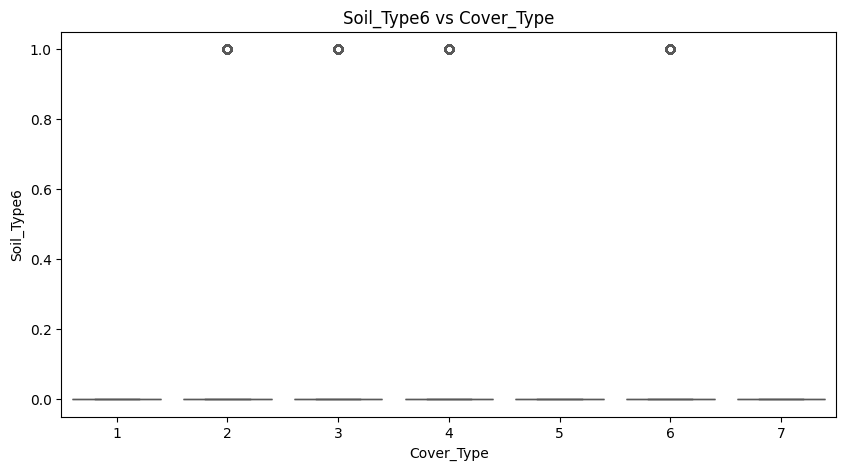

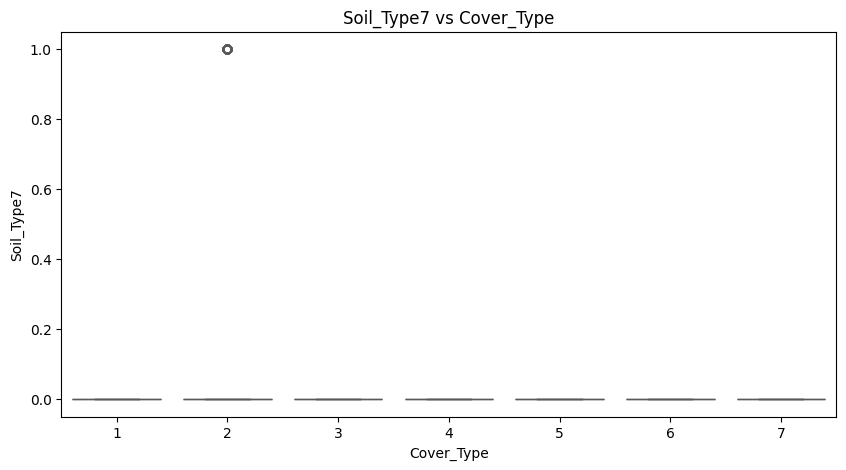

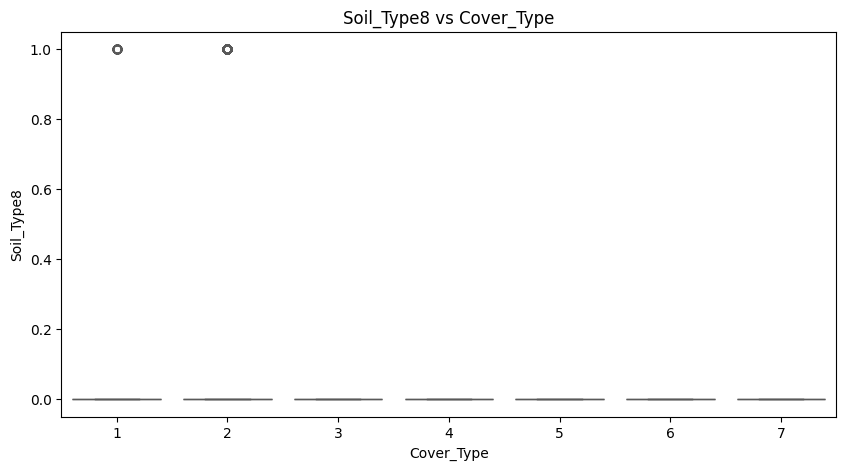

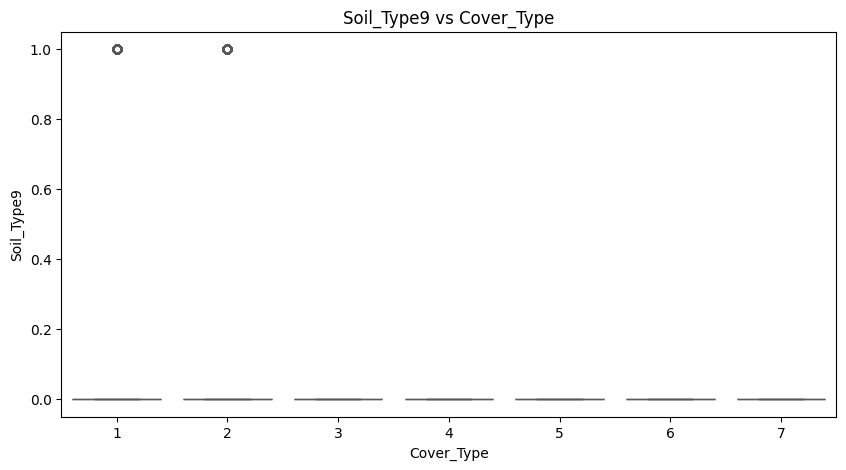

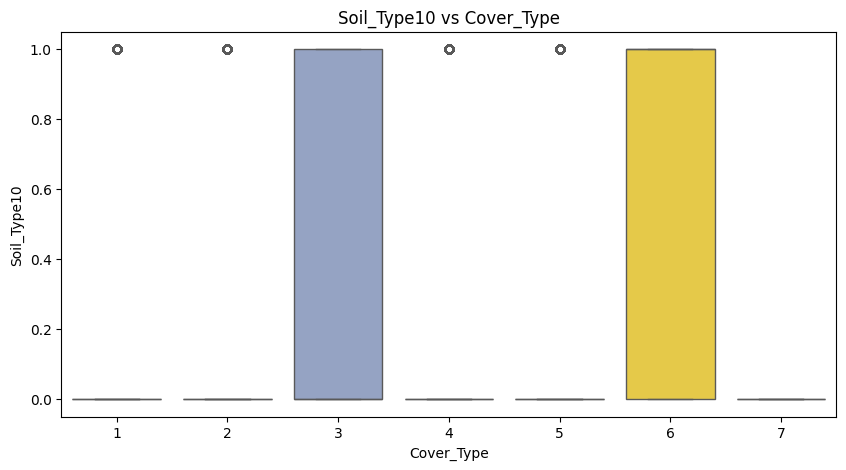

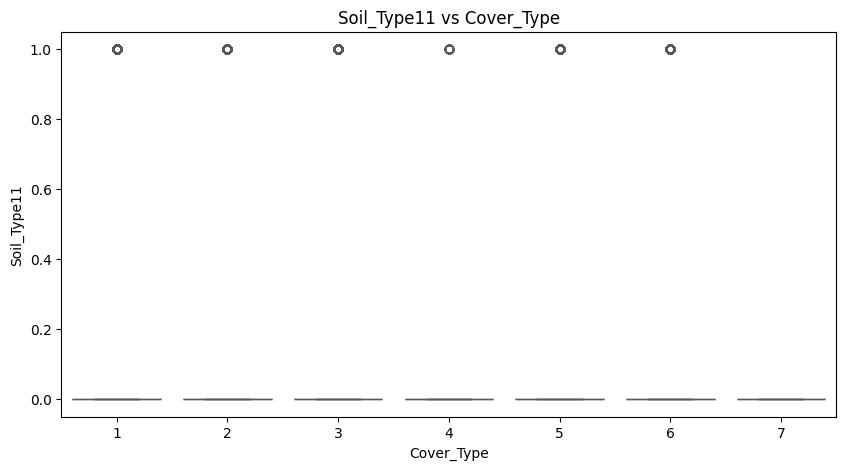

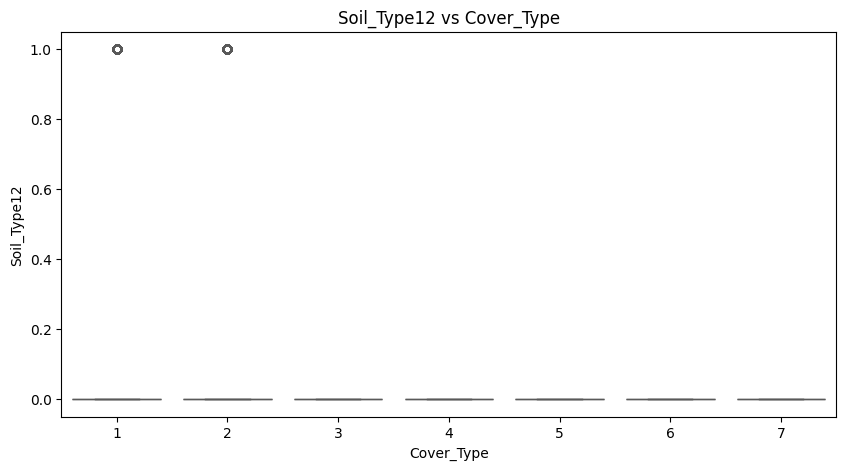

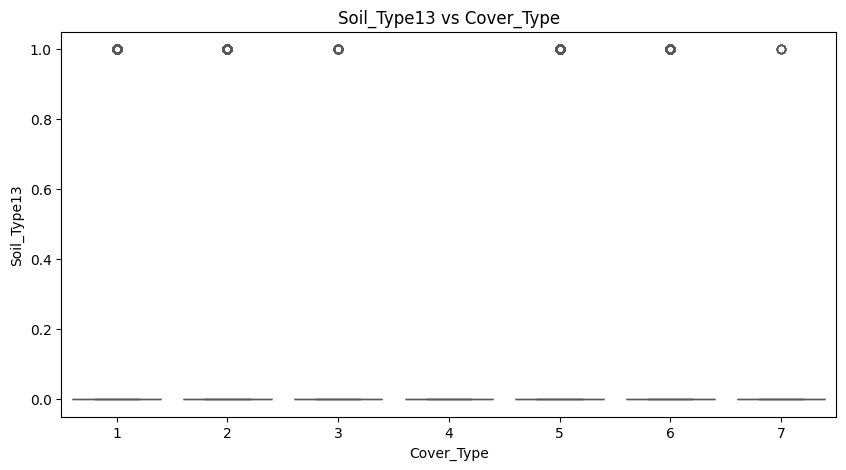

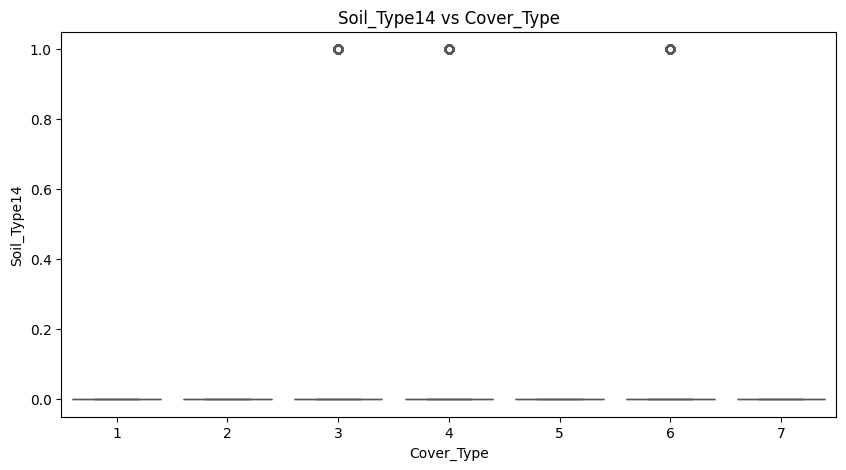

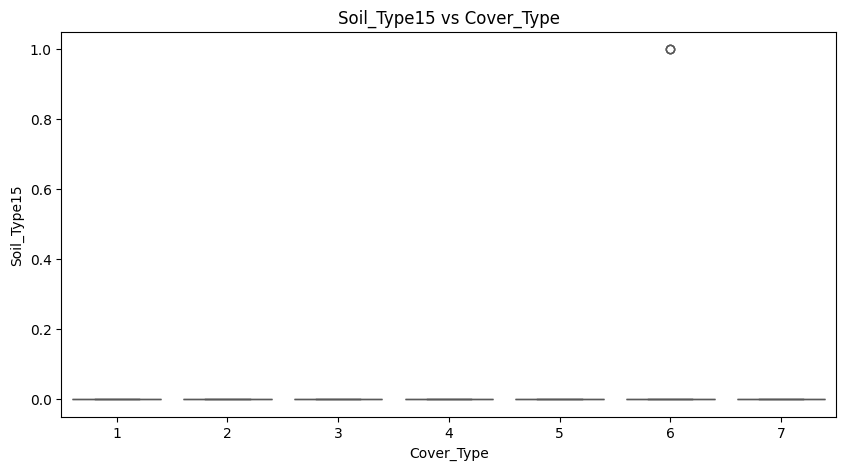

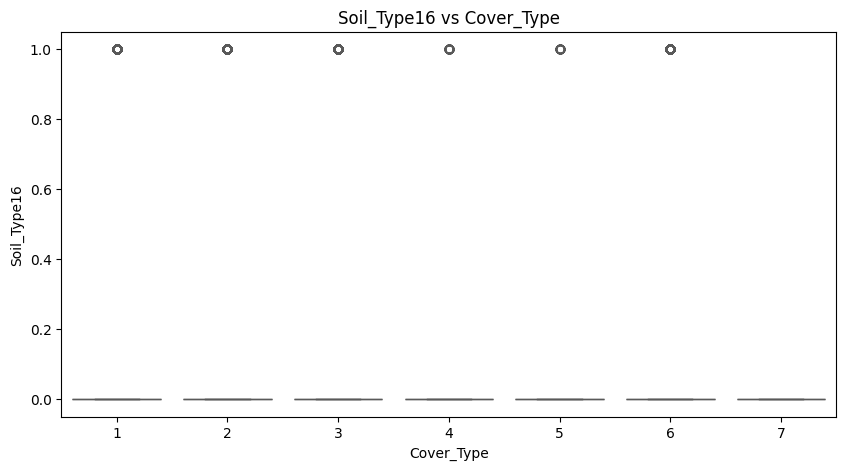

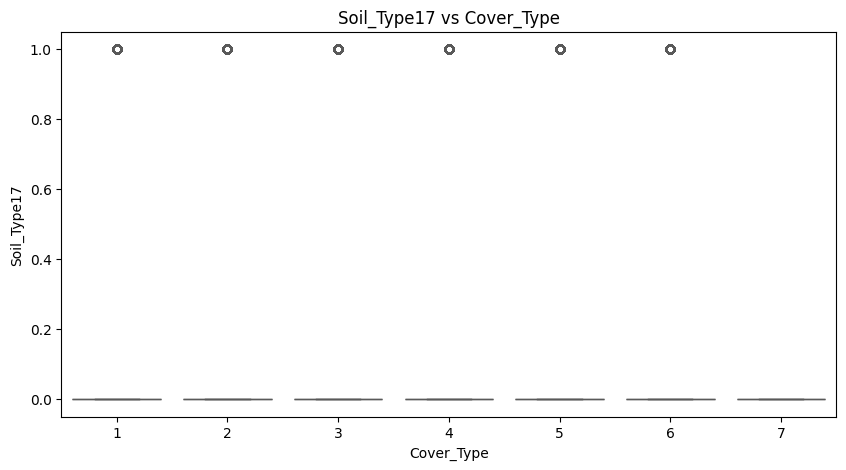

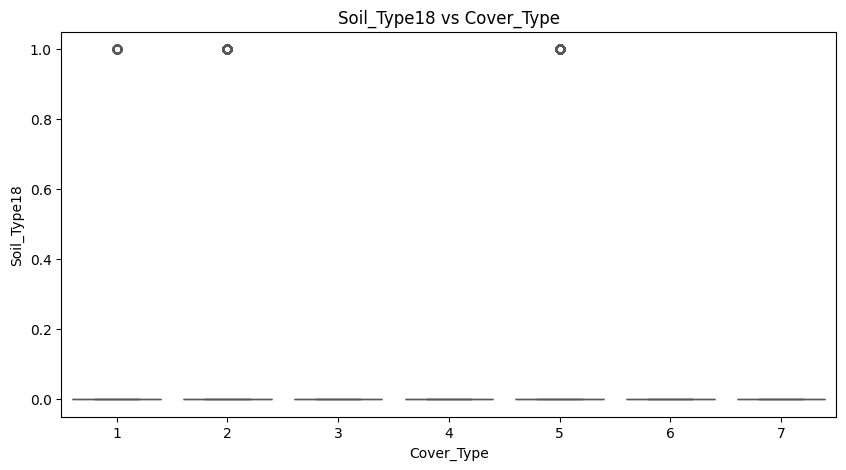

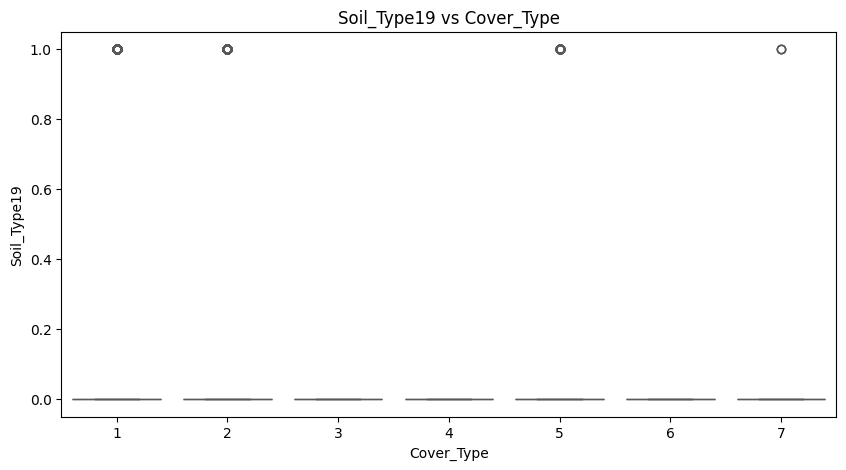

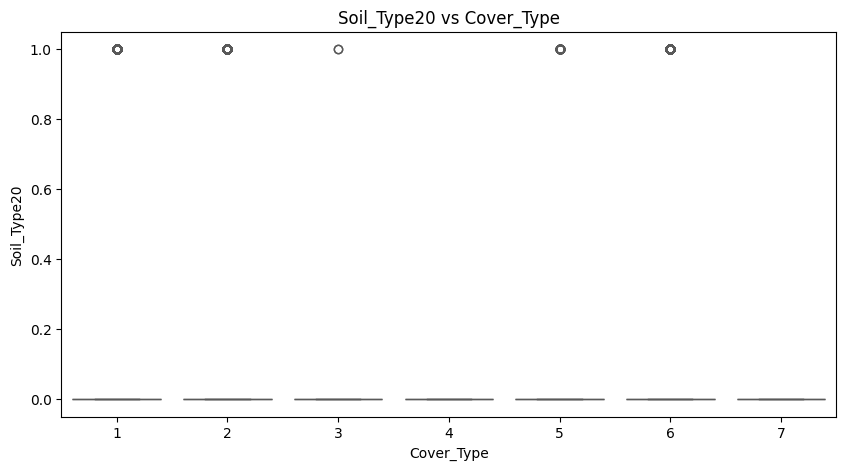

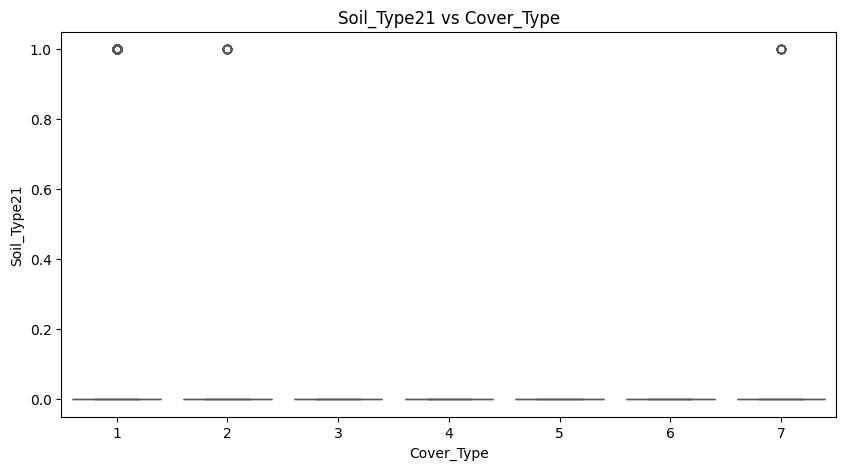

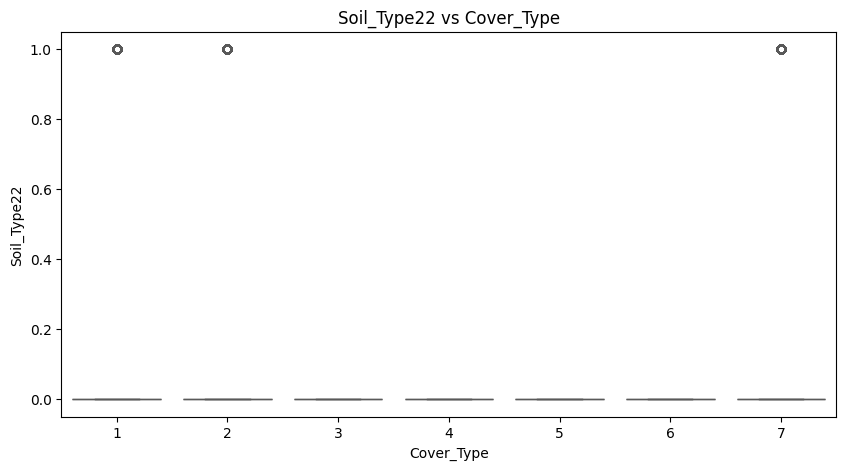

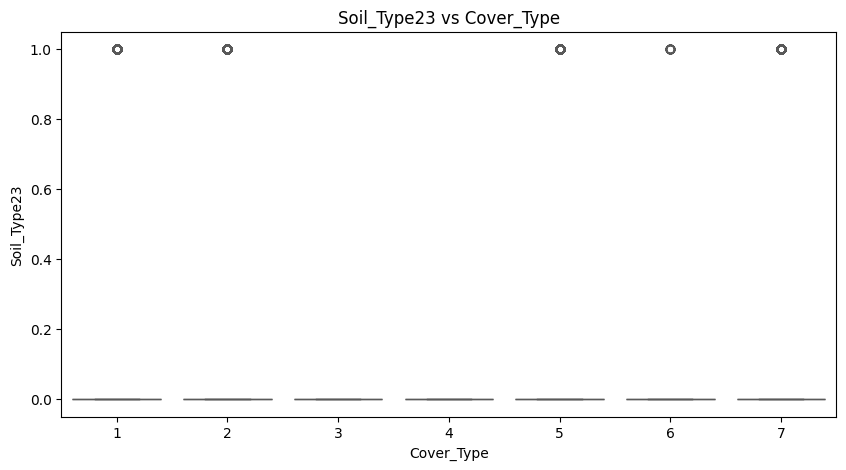

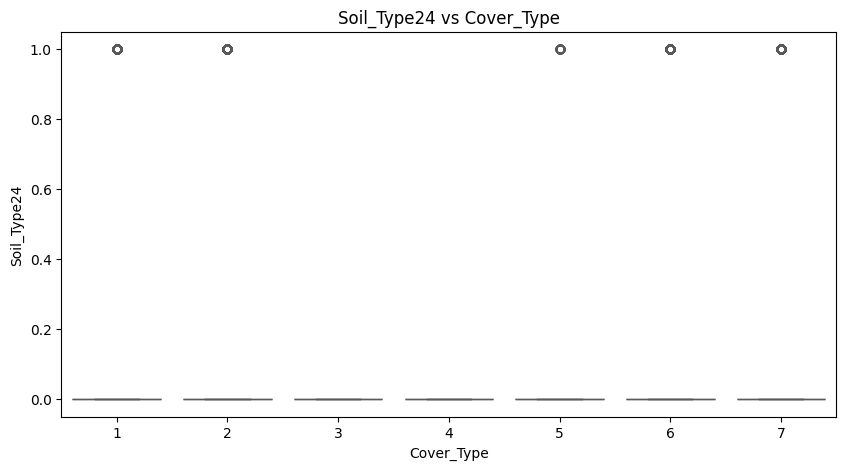

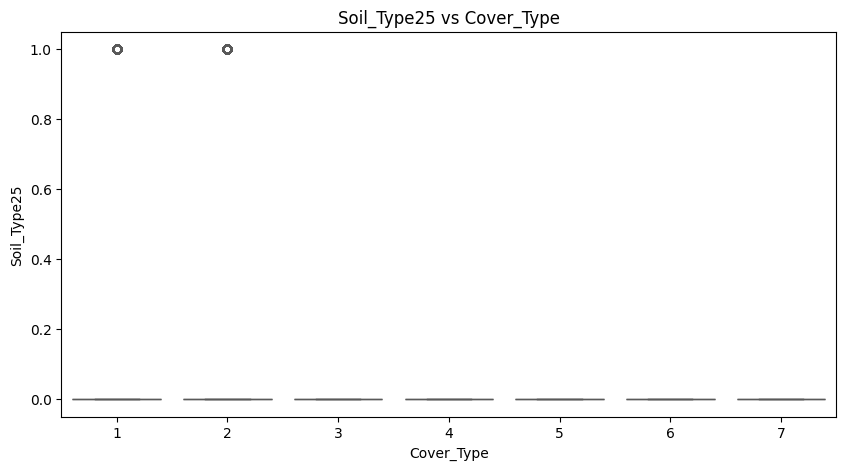

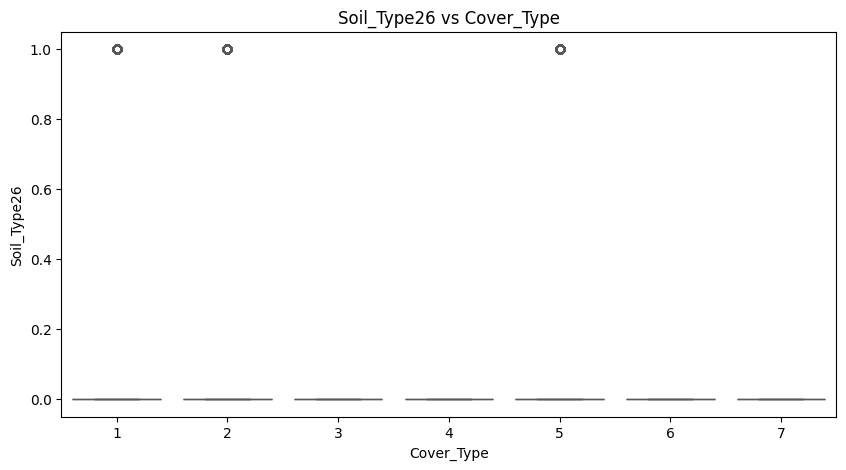

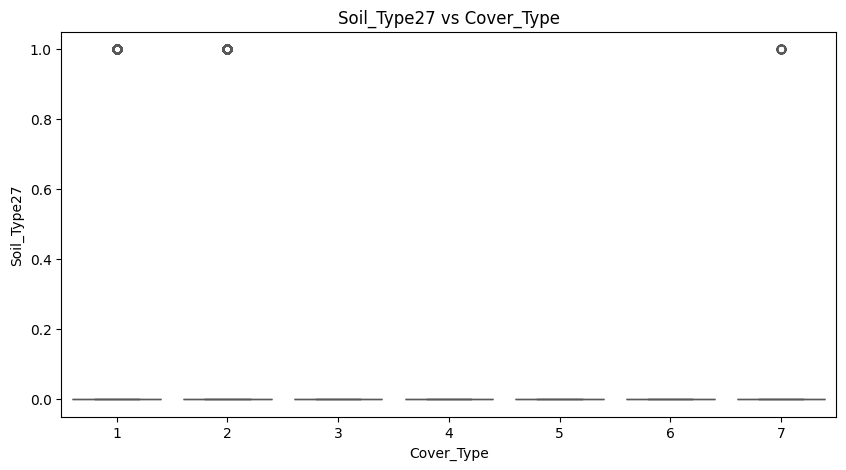

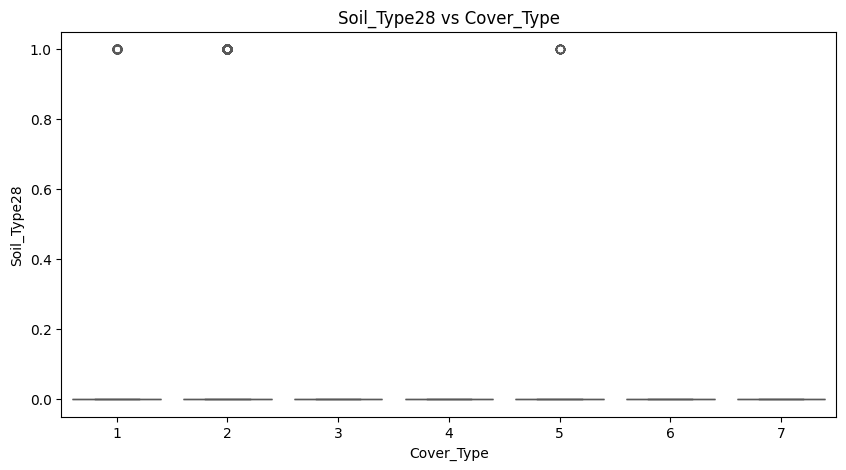

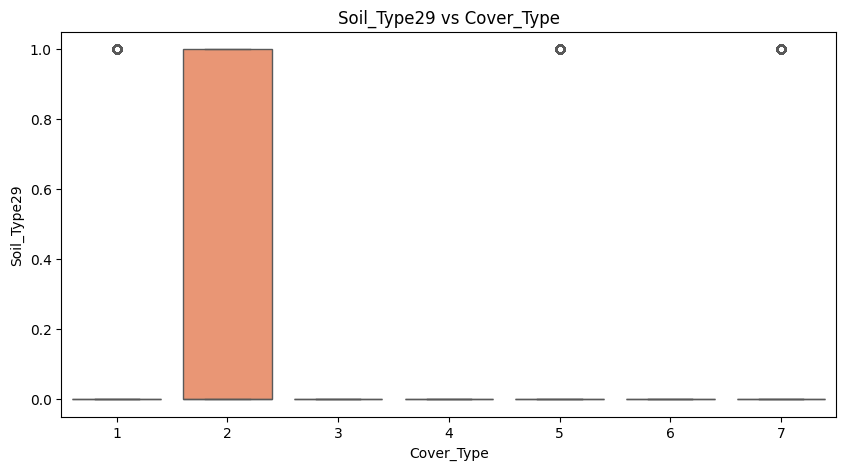

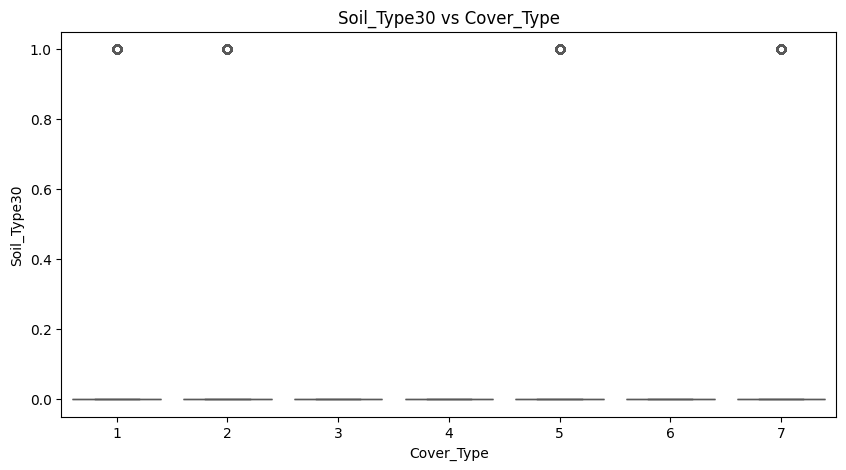

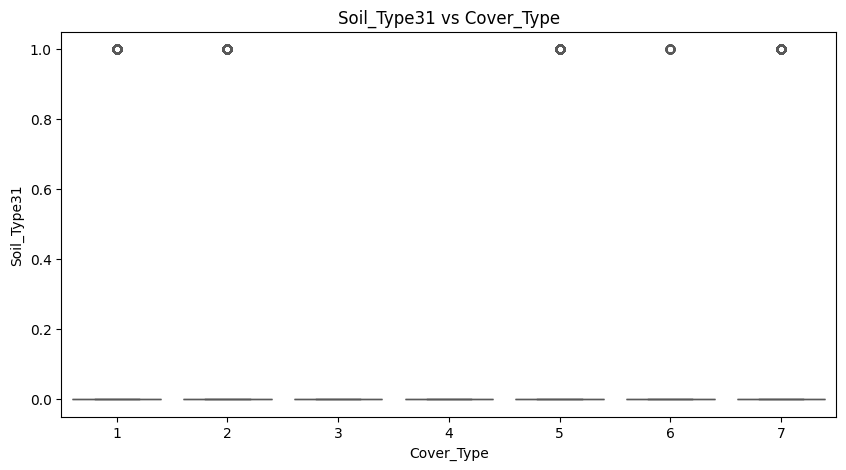

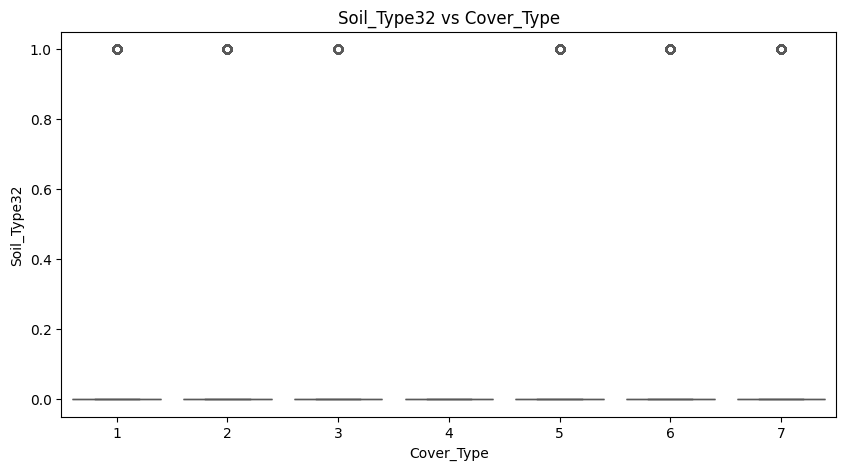

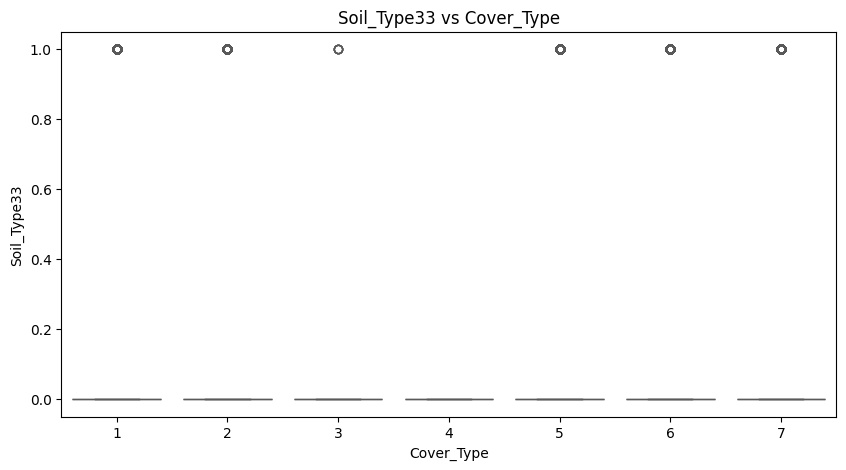

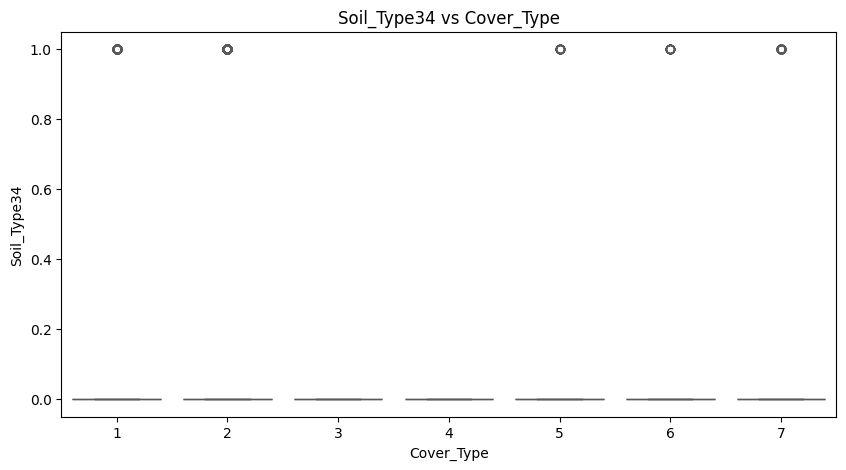

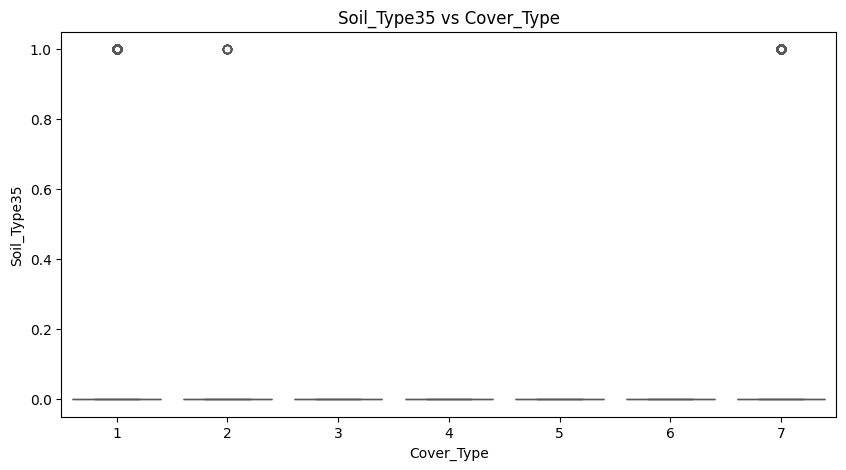

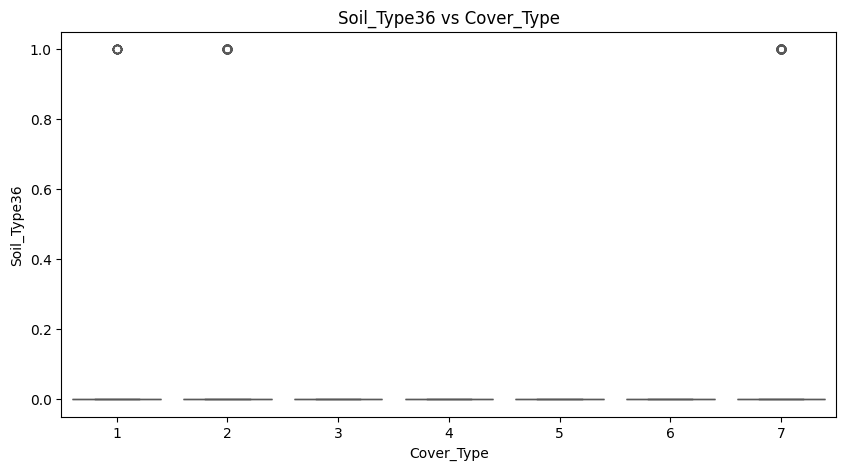

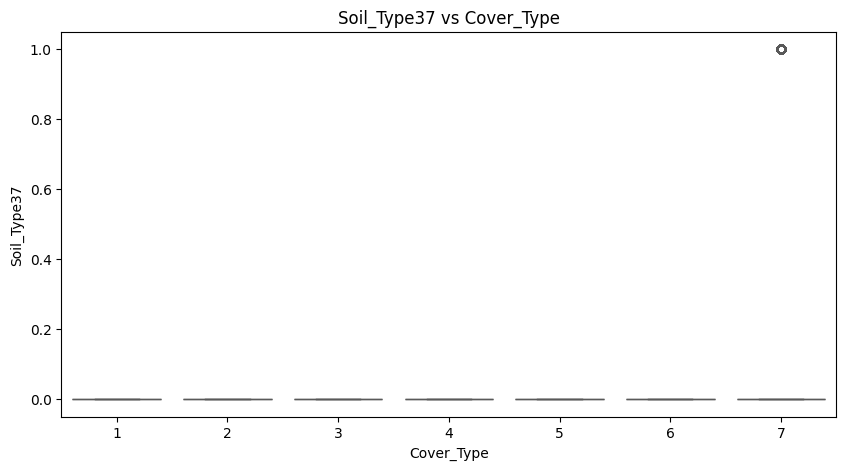

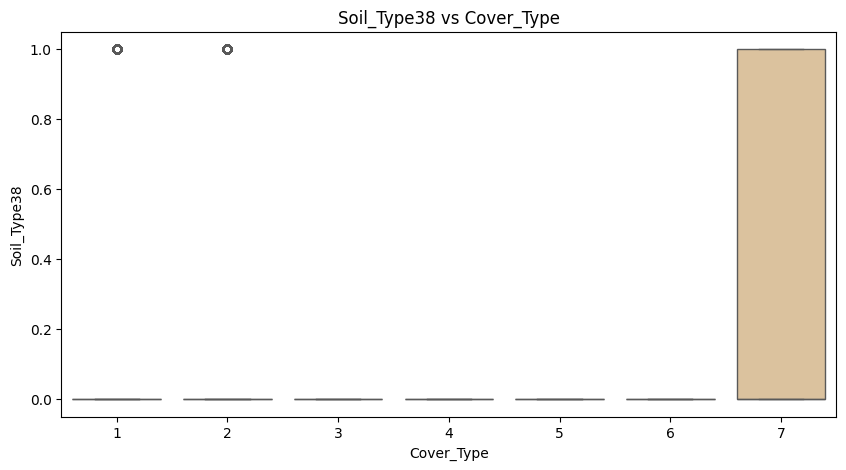

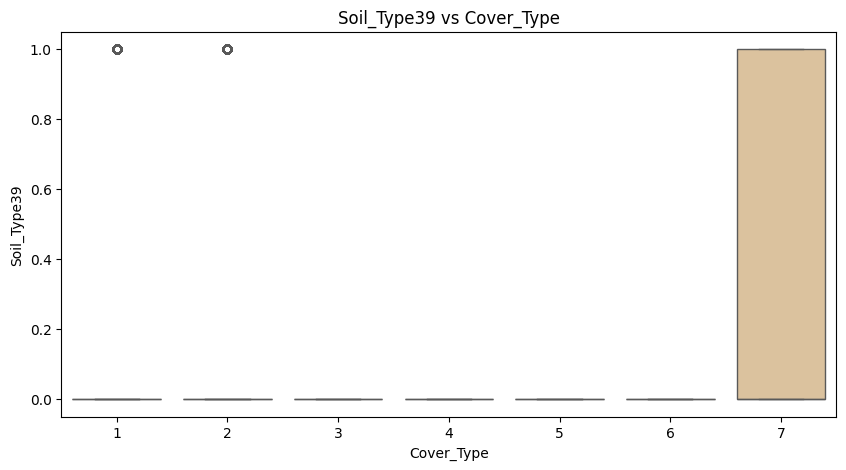

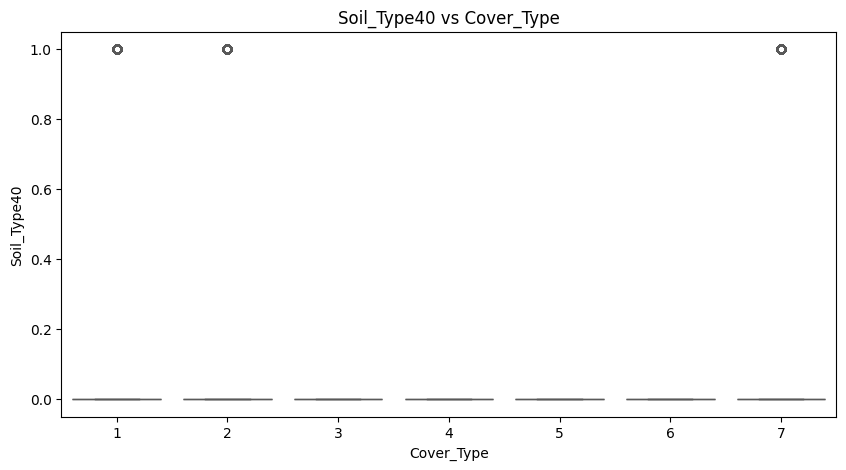

In [ ]:
## 7. Relationship between each feature and target (boxplots)
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x="Cover_Type", y=col, data=data, palette="Set2")
    plt.title(f"{col} vs Cover_Type")
    plt.show()